# Table of Contents
 <p>

In [1]:
%matplotlib inline
import math,sys,os,numpy as np
from numpy.random import random
from matplotlib import pyplot as plt, rcParams, animation, rc
from __future__ import print_function, division
from ipywidgets import interact, interactive, fixed
from ipywidgets.widgets import *
rc('animation', html='html5')
rcParams['figure.figsize'] = 3, 3
%precision 4
np.set_printoptions(precision=4, linewidth=100)

In [2]:
def lin(a,b,x): return a*x+b

In [3]:
a=3.
b=8.

In [4]:
n=30
x = random(n)
y = lin(a,b,x)

In [5]:
x

array([ 0.1221,  0.3829,  0.4685,  0.3863,  0.5388,  0.6117,  0.9014,  0.8605,  0.6426,  0.0875,
        0.426 ,  0.3872,  0.8343,  0.3434,  0.3341,  0.1108,  0.344 ,  0.7151,  0.7322,  0.2191,
        0.2012,  0.1603,  0.6279,  0.3752,  0.5868,  0.1222,  0.1049,  0.7985,  0.0689,  0.0319])

In [6]:
y

array([  8.3663,   9.1488,   9.4055,   9.159 ,   9.6163,   9.835 ,  10.7041,  10.5816,   9.9279,
         8.2625,   9.2781,   9.1617,  10.5028,   9.0302,   9.0022,   8.3323,   9.032 ,  10.1452,
        10.1965,   8.6573,   8.6035,   8.481 ,   9.8837,   9.1257,   9.7605,   8.3667,   8.3146,
        10.3955,   8.2067,   8.0958])

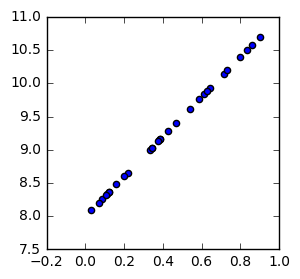

In [7]:
plt.scatter(x,y)

In [8]:
def sse(y,y_pred): return ((y-y_pred)**2).sum()
def loss(y,a,b,x): return sse(y, lin(a,b,x))
def avg_loss(y,a,b,x): return np.sqrt(loss(y,a,b,x)/n)

In [9]:
a_guess=-1.
b_guess=1.
avg_loss(y, a_guess, b_guess, x)

8.7326

In [10]:
lr=0.01
# d[(y-(a*x+b))**2,b] = 2 (b + a x - y)      = 2 (y_pred - y)
# d[(y-(a*x+b))**2,a] = 2 x (b + a x - y)    = x * dy/db

In [11]:
def upd():
    global a_guess, b_guess
    y_pred = lin(a_guess, b_guess, x)
    dydb = 2 * (y_pred - y)
    dyda = x*dydb
    a_guess -= lr*dyda.mean()
    b_guess -= lr*dydb.mean()

In [13]:
fig = plt.figure(dpi=100, figsize=(5, 4))
plt.scatter(x,y)
line, = plt.plot(x,lin(a_guess,b_guess,x))
plt.close()

def animate(i):
    line.set_ydata(lin(a_guess,b_guess,x))
    for i in range(10): upd()
    return line,
#sudo apt install ffmpeg
ani = animation.FuncAnimation(fig, animate, np.arange(0, 40), interval=100)
ani